In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.arange(-8,8,.1)

In [3]:
y=1/(1+np.exp(-x))

Text(0, 0.5, 'y')

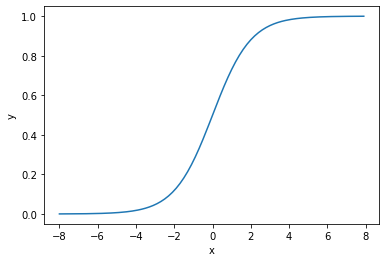

In [4]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [5]:
w1=0.5
w2=1.0
w3=2.0
l1='w1=0.5'
l2='w2=1.0'
l3='w3=2.0'

In [6]:
l=[(w1,l1),(w2,l2),(w3,l3)]

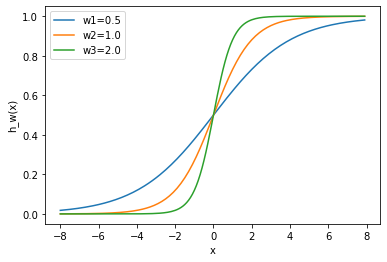

In [7]:
for w, l in l:
    y=1/(1+np.exp(-x*w))
    plt.plot(x,y,label=l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
    

In [8]:
w=5.0
b1=-8.0
b2=0.0
b3=8.0
l1='b1=-8.0'
l2='b2=0.0'
l3='b3=8.0'
l=[(b1,l1),(b2,l2),(b3,l3)]

In [9]:
l

[(-8.0, 'b1=-8.0'), (0.0, 'b2=0.0'), (8.0, 'b3=8.0')]

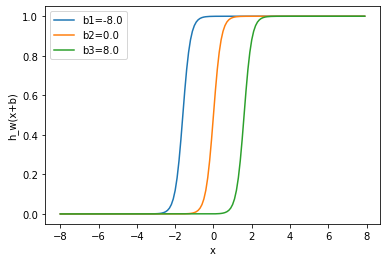

In [10]:
for b,l in l:
    y=1/(1+np.exp(-x*w+b))
    plt.plot(x,y,label=l)
plt.xlabel('x')
plt.ylabel('h_w(x+b)')
plt.legend(loc=2)

In [11]:
w1=np.array([[.2,.2,.2],[.4,.4,.4],[.6,.6,.6]])

In [12]:
w1

array([[0.2, 0.2, 0.2],
       [0.4, 0.4, 0.4],
       [0.6, 0.6, 0.6]])

In [20]:
w2[0,:]=np.array([.5,.5,.5])

In [21]:
w2

array([[0.5, 0.5, 0.5]])

In [22]:
b1=np.array([.8,.8,.8])

In [24]:
b2=np.array([.2])

In [25]:
def f(x):
    return 1/(1+np.exp(-x))

In [35]:
def cal(n_layers,x,w,b):
    for l in range(n_layers-1):
        if l==0:
            node_in=x
        else:
            node_in=h;
        h=np.zeros((w[l].shape[0]))    
        for i in range(w[l].shape[0]):
            f_sum=0
            for j in range(w[l].shape[1]):
                f_sum+=w[l][i][j]*node_in[j]
            f_sum+=b[l][i]
            h[i]=f(f_sum)
    return h       

In [36]:
w=[w1,w2]
b=[b1,b2]
x=[1.5,2.0,3.0]

In [37]:
w[1].shape[0]

1

In [39]:
%timeit cal(3,x,w,b)

20.5 µs ± 272 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [45]:
def optimized_cal(n_layers,x,w,b):
    for l in range(n_layers-1):
        if l==0:
            node_in=x
        else:
            node_in=h;
        z=w[l].dot(node_in)+b[l]
        h=f(z)
    return h   

In [46]:
cal(3,x,w,b)

array([0.83545566])

In [47]:
optimized_cal(3,x,w,b)

array([0.83545566])

In [48]:
%timeit cal(3,x,w,b)

20.5 µs ± 405 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
%timeit optimized_cal(3,x,w,b)

10.6 µs ± 48.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
